#### Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading data

In [2]:
df_train = pd.read_csv(r"train_hr.csv", header=0, index_col=None)
df_test = pd.read_csv(r"test_hr.csv", header=0, index_col=None)

#### Data Preprocessing

In [3]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df_test.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
df_train.shape

(54808, 14)

In [6]:
df_test.shape

(23490, 13)

In [7]:
df_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
df_test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [9]:
df_train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [10]:
df_test.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [11]:
for i in df_train.columns:
    print({i:df_train[i].unique()})    #printing unique values in each column

{'employee_id': array([65438, 65141,  7513, ..., 13918, 13614, 51526], dtype=int64)}
{'department': array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)}
{'region': array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)}
{'education': array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)}
{'gender': array(['f', 'm'], dtype=object)}
{'recruitment_channel': array(['sourcing', 'other', 'referred'], dtype=object)}
{'no_of_trainings': array(

In [12]:
df_train["education"].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [13]:
df_train["previous_year_rating"].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [14]:
df_test["education"].unique()

array(["Bachelor's", "Master's & above", nan, 'Below Secondary'],
      dtype=object)

In [15]:
df_test["previous_year_rating"].unique()

array([nan,  3.,  1.,  2.,  4.,  5.])

In [16]:
df_train.isnull().sum()  #to find the missing no. of values in each column

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [17]:
df_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [18]:
# Replacing the nan values with mode as the columns are categorical

df_train["education"].fillna(df_train["education"].mode()[0], inplace=True)
df_train["previous_year_rating"].fillna(df_train["previous_year_rating"].mode()[0], inplace=True)

In [19]:
# Replacing the nan values with mode as the columns are categorical

df_test["education"].fillna(df_test["education"].mode()[0], inplace=True)
df_test["previous_year_rating"].fillna(df_test["previous_year_rating"].mode()[0], inplace=True)

In [20]:
df_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [21]:
df_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [22]:
df_train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

#### Data Visualisation

In [23]:
# Separating the categorical columns

Cat_col = []

for i in df_train.columns:
    if df_train[i].dtype == "object":
        Cat_col.append(i)

In [24]:
Cat_col

['department', 'region', 'education', 'gender', 'recruitment_channel']

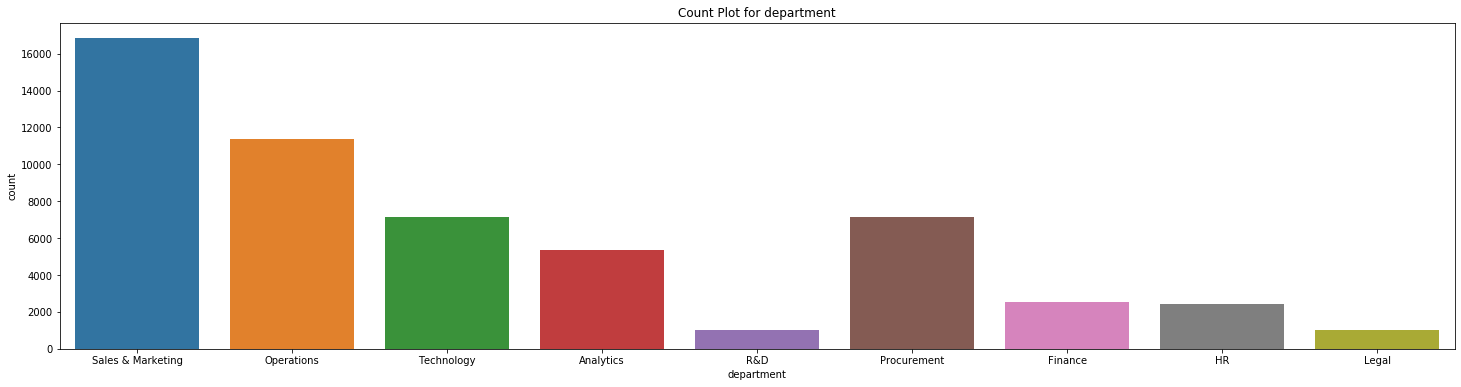

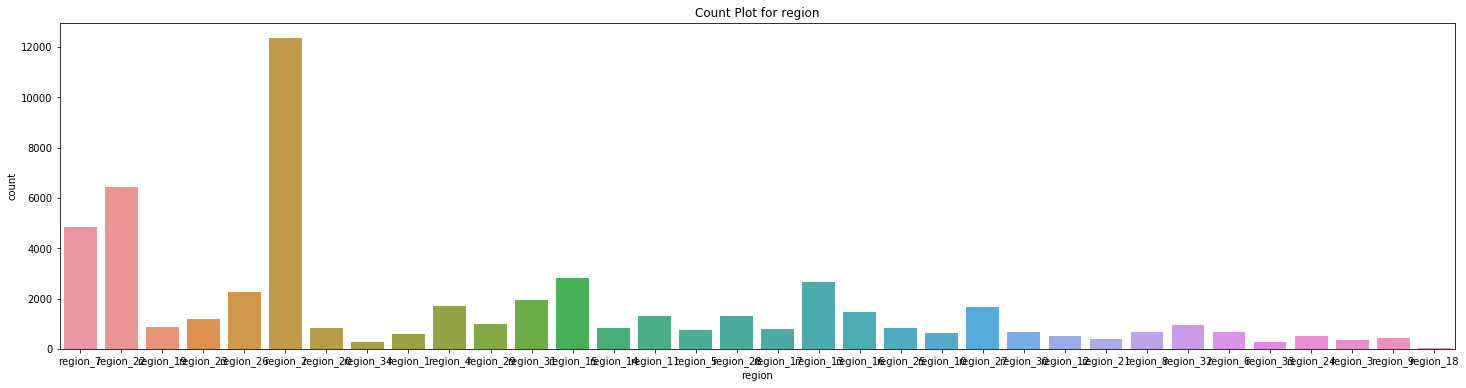

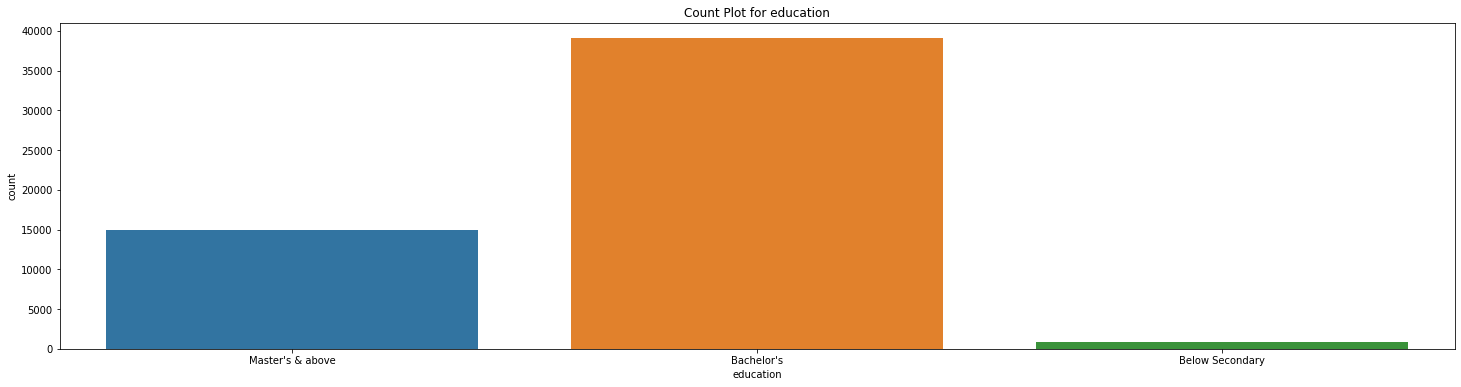

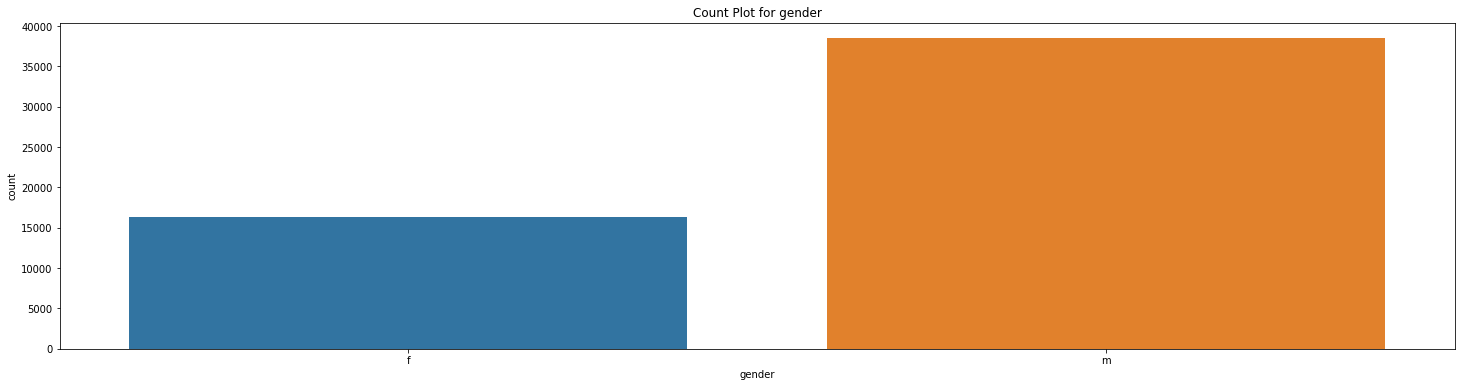

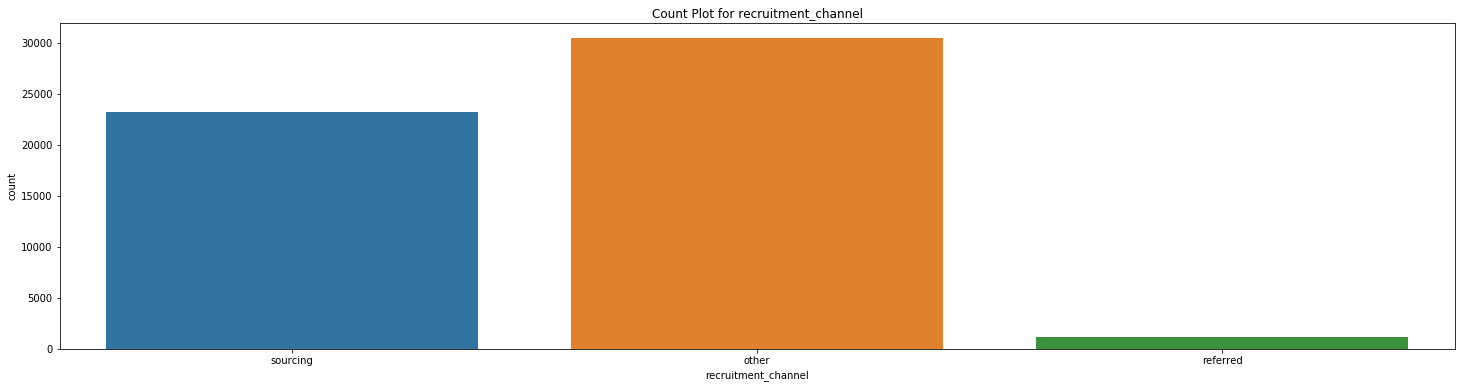

In [25]:
for i in Cat_col:
    plt.figure(figsize=(25, 6))  # Adjust the figure size as needed
    sns.countplot(x=i, data=df_train)
    plt.title(f'Count Plot for {i}')
    plt.show()

In [26]:
# Separating the continuous variable columns

int_col = []

for i in df_train.columns:
    if df_train[i].dtype == "int64" or df_train[i].dtype == "float64":
        int_col.append(i)

In [27]:
int_col

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

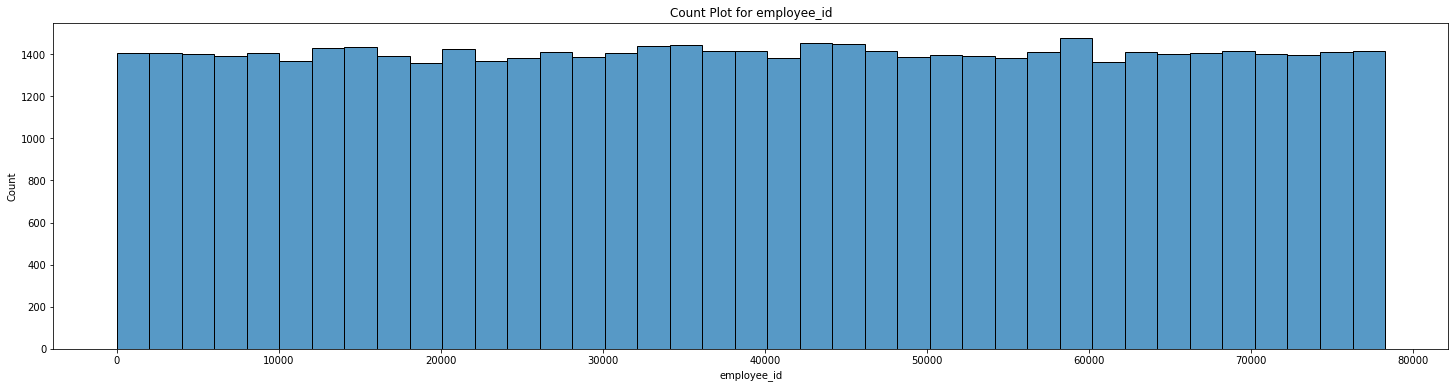

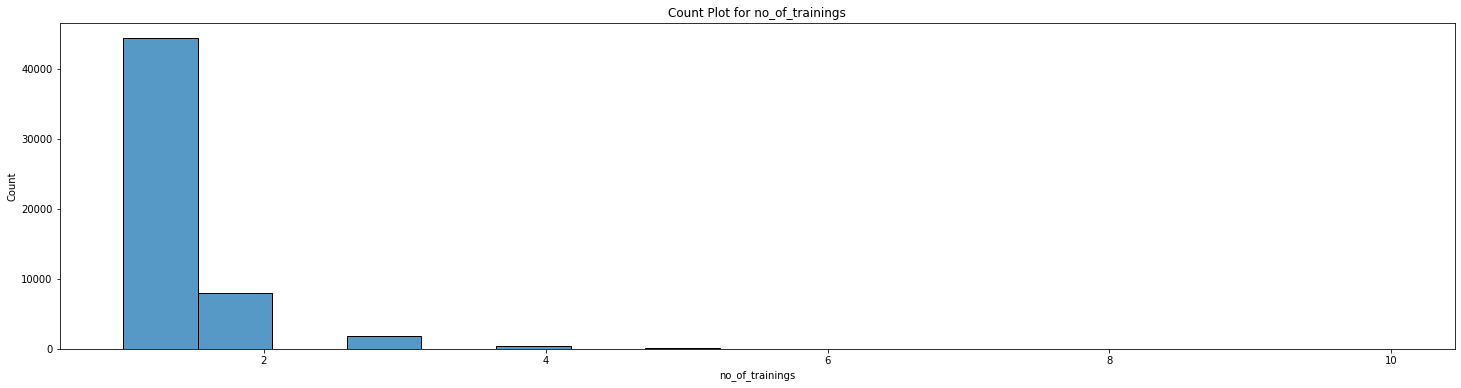

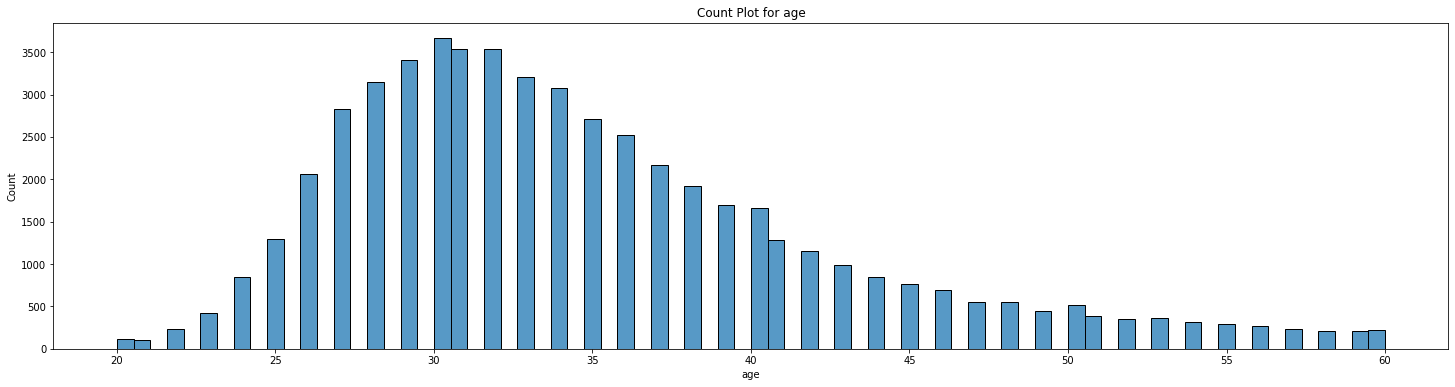

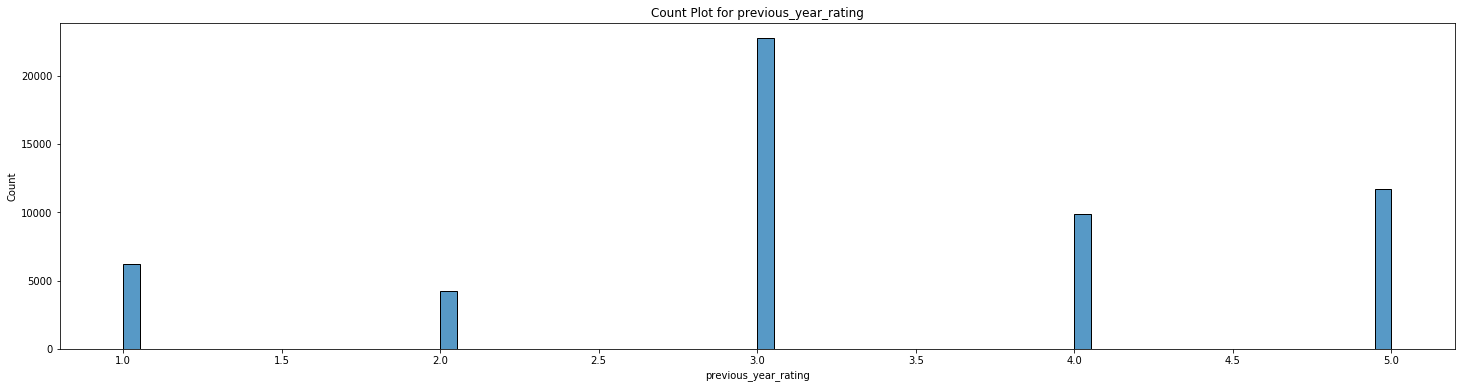

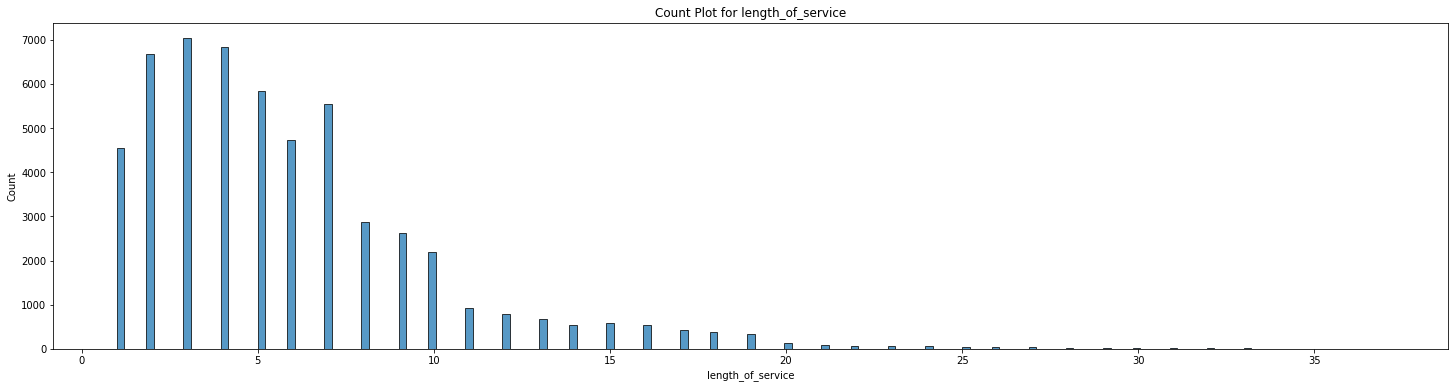

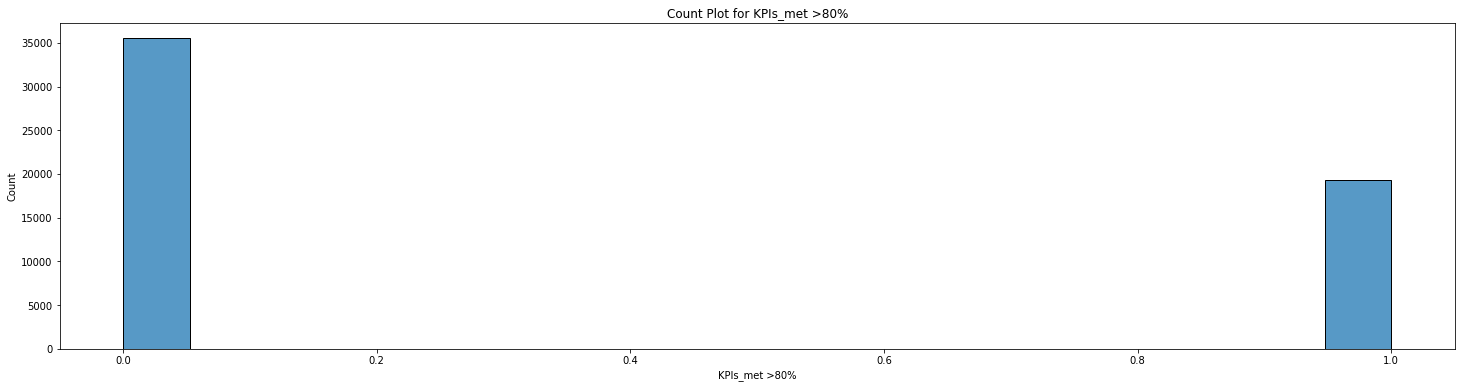

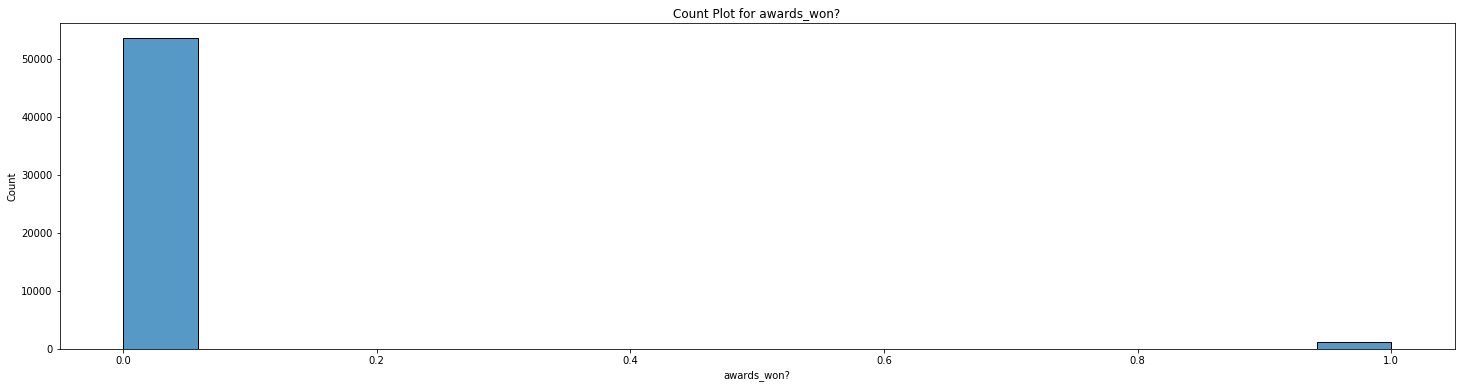

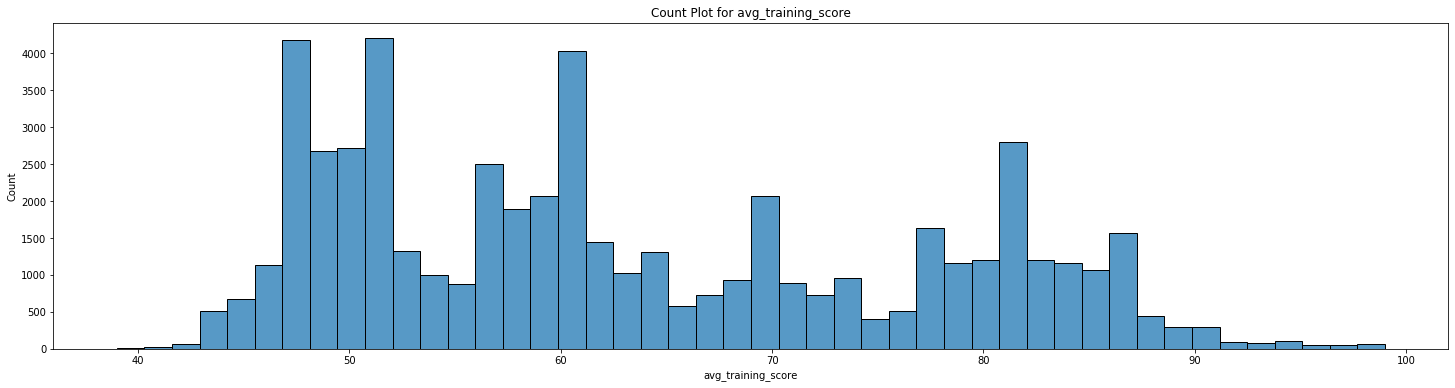

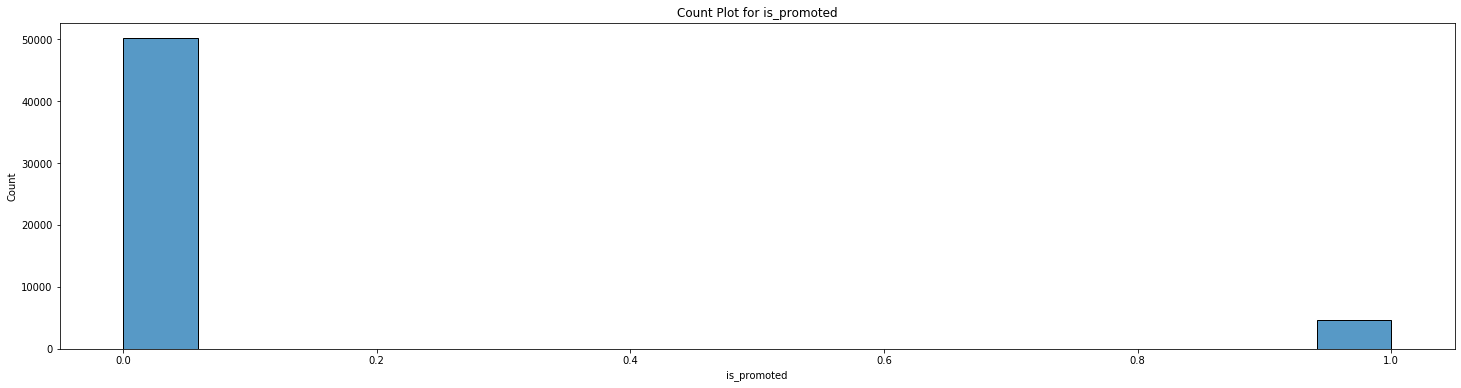

In [28]:
for i in int_col:
    plt.figure(figsize=(25, 6))  # Adjust the figure size as needed
    sns.histplot(x=i, data=df_train, legend=True)
    plt.title(f'Count Plot for {i}')
    plt.show()

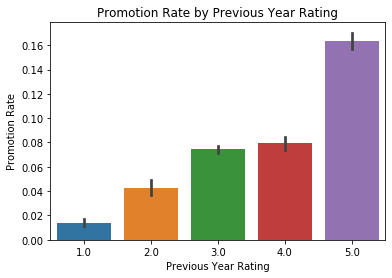

In [29]:
sns.barplot(x='previous_year_rating', y='is_promoted', data=df_train)
plt.title('Promotion Rate by Previous Year Rating')
plt.xlabel('Previous Year Rating')
plt.ylabel('Promotion Rate')
plt.show()

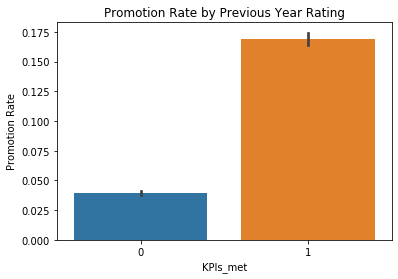

In [30]:
sns.barplot(x='KPIs_met >80%', y='is_promoted', data=df_train)
plt.title('Promotion Rate by Previous Year Rating')
plt.xlabel('KPIs_met')
plt.ylabel('Promotion Rate')
plt.show()

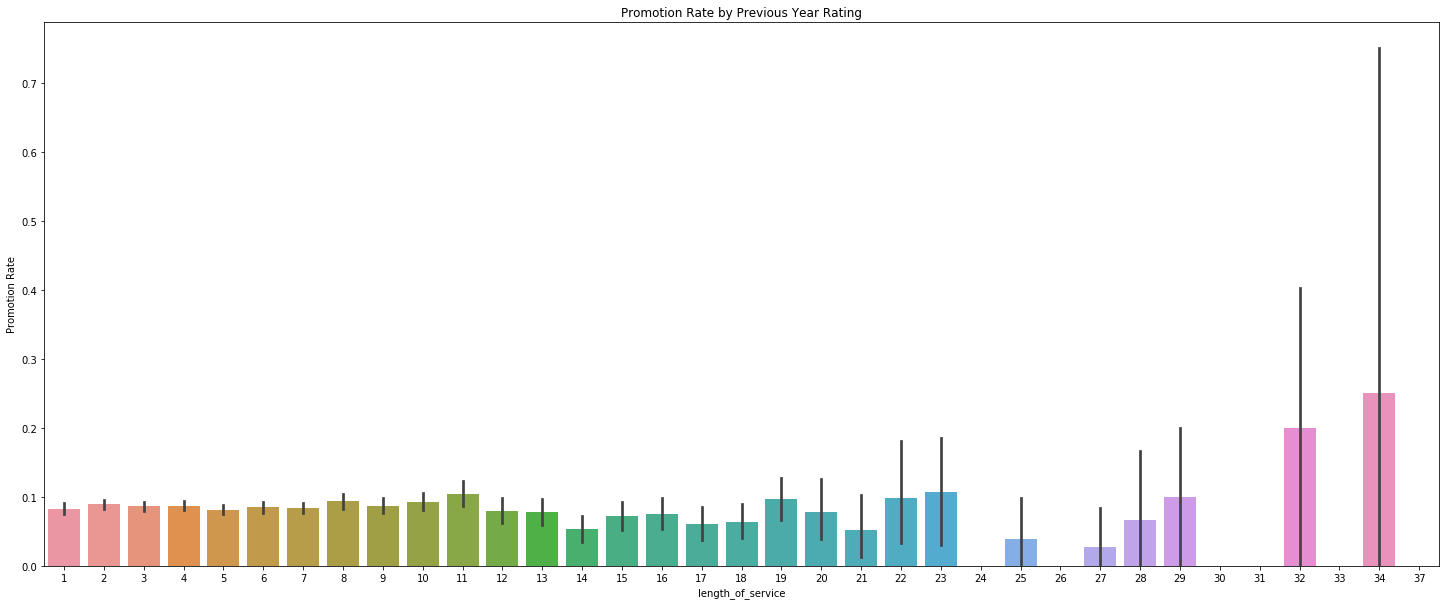

In [31]:
plt.figure(figsize=(25, 10))
sns.barplot(x='length_of_service', y='is_promoted', data=df_train)
plt.title('Promotion Rate by Previous Year Rating')
plt.xlabel('length_of_service')
plt.ylabel('Promotion Rate')
plt.show()

In [32]:
# Separating the categorical columns to convert it into numbers

colname=[]
for i in df_train.columns:
    if df_train[i].dtype == "object":
        colname.append(i)
colname

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in colname:
    df_train[x]=le.fit_transform(df_train[x])

In [34]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [35]:
colname1 = []

for i in df_test.columns:
    if df_test[i].dtype == "object":
        colname1.append(i)
        
colname1

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in colname1:
    df_test[x]=le.fit_transform(df_test[x])

In [37]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,3.0,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61


In [38]:
# Creating X and Y

X = df_train.values[:,0:-1]
Y = df_train.values[:,-1]
Y = Y.astype(int)

In [39]:
print(X.shape)
print(Y.shape)

(54808, 13)
(54808,)


### Scaling the data

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# scaler.fit_transform(X)

In [41]:
print(X)

[[ 1.16185837  0.80893285  1.77652645 ...  1.35687789 -0.15401776
  -1.07593145]
 [ 1.14870885 -0.38818322 -0.16303375 ... -0.73698599 -0.15401776
  -0.25328242]
 [-1.40274081  0.80893285 -0.61940086 ... -0.73698599 -0.15401776
  -1.00114517]
 ...
 [-1.11916278 -1.98433798 -1.76031862 ...  1.35687789 -0.15401776
   1.1676568 ]
 [-1.13262222  0.80893285  2.00471    ... -0.73698599 -0.15401776
  -1.37507655]
 [ 0.54591182 -1.1862606  -0.16303375 ... -0.73698599 -0.15401776
  -1.07593145]]


### Splitting the data into Train and Test

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(38365, 13)
(16443, 13)
(38365,)
(16443,)


### Running the Basic Decision tree model

In [44]:
from sklearn.tree import DecisionTreeClassifier

#creating a model object
model_DT = DecisionTreeClassifier(random_state=10, criterion="gini")

#training the data on Model object
model_DT.fit(X_train, Y_train)

#predicting on test data
y_pred = model_DT.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [45]:
print(list(zip(Y_test, y_pred)))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test, y_pred))
print()
print(accuracy_score(Y_test, y_pred))
print()
print(classification_report(Y_test, y_pred))

[[14160   904]
 [  779   600]]

0.8976464148877942

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     15064
           1       0.40      0.44      0.42      1379

    accuracy                           0.90     16443
   macro avg       0.67      0.69      0.68     16443
weighted avg       0.90      0.90      0.90     16443



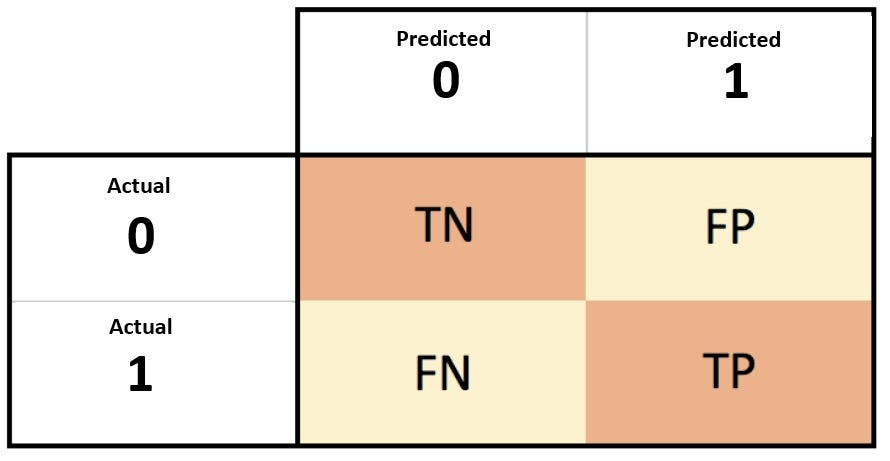

* True Positives (TP): Actual positives correctly predicted as positives.
* True Negatives (TN): Actual negatives correctly predicted as negatives.
* False Positives (FP): Actual negatives incorrectly predicted as positives.
* False Negatives (FN): Actual positives incorrectly predicted as negatives.

In [47]:
model_DT.score(X_train, Y_train)

1.0

In [48]:
model_DT.feature_importances_   # to measure the importance of each variable

array([0.18269308, 0.13768663, 0.06972398, 0.01550067, 0.01856039,
       0.02295149, 0.02337246, 0.09662129, 0.05212675, 0.06090048,
       0.04304412, 0.02416805, 0.2526506 ])

In [49]:
print(list(zip(df_train.columns[0:-1],model_DT.feature_importances_)))

[('employee_id', 0.1826930787419816), ('department', 0.13768663055700342), ('region', 0.0697239839924877), ('education', 0.015500669049188976), ('gender', 0.018560391263443013), ('recruitment_channel', 0.022951490730594663), ('no_of_trainings', 0.02337246034315437), ('age', 0.0966212928983274), ('previous_year_rating', 0.052126745939935645), ('length_of_service', 0.060900481137309725), ('KPIs_met >80%', 0.043044124814624614), ('awards_won?', 0.024168046746319394), ('avg_training_score', 0.2526506037856294)]


In [50]:
sample=pd.DataFrame()
 
sample["Column"]=df_train.columns[0:-1]
sample["Imp value"]=model_DT.feature_importances_
 
sample.sort_values("Imp value",ascending=False)

,Column,Imp value
12,avg_training_score,0.252651
0,employee_id,0.182693
1,department,0.137687
7,age,0.096621
2,region,0.069724
9,length_of_service,0.060900
8,previous_year_rating,0.052127
10,KPIs_met >80%,0.043044
11,awards_won?,0.024168
6,no_of_trainings,0.023372


#### SVC MODEL

In [51]:
from sklearn.svm import SVC
#create a model
svm= SVC(kernel="rbf", gamma=0.1, C=1,random_state=10)
#fitting training data to the model
svm.fit(X_train, Y_train)

Y_pred3=svm.predict(X_test)
print(Y_pred3)

[0 0 0 ... 0 0 0]


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred3)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred3))
 
acc=accuracy_score(Y_test, Y_pred3)
print("Accuracy of the model: ",acc)

[[15042    22]
 [ 1224   155]]
Classification report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15064
           1       0.88      0.11      0.20      1379

    accuracy                           0.92     16443
   macro avg       0.90      0.56      0.58     16443
weighted avg       0.92      0.92      0.90     16443

Accuracy of the model:  0.924223073648361


#### Converting Imbalanced data to Balanced data Using SMOTE

In [53]:
X = df_train.values[:,0:-1]
Y = df_train.values[:,-1]
Y = Y.astype(int)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

array([[ 1.16185837,  0.80893285,  1.77652645, ...,  1.35687789,
        -0.15401776, -1.07593145],
       [ 1.14870885, -0.38818322, -0.16303375, ..., -0.73698599,
        -0.15401776, -0.25328242],
       [-1.40274081,  0.80893285, -0.61940086, ..., -0.73698599,
        -0.15401776, -1.00114517],
       ...,
       [-1.11916278, -1.98433798, -1.76031862, ...,  1.35687789,
        -0.15401776,  1.1676568 ],
       [-1.13262222,  0.80893285,  2.00471   , ..., -0.73698599,
        -0.15401776, -1.37507655],
       [ 0.54591182, -1.1862606 , -0.16303375, ..., -0.73698599,
        -0.15401776, -1.07593145]])

In [55]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state = 10)
  

In [56]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=1)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  3289
Before OverSampling, counts of label '0':  35076
After OverSampling, the shape of train_X:  (70152, 13)
After OverSampling, the shape of train_y:  (70152,)
After OverSampling, counts of label '1':  35076
After OverSampling, counts of label '0':  35076


In [57]:
from sklearn.tree import DecisionTreeClassifier

#creating a model object
model_DT = DecisionTreeClassifier(random_state=10, criterion="gini")

#training the data on Model object
model_DT.fit(X_train_res, Y_train_res)

#predicting on test data
y_pred = model_DT.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [58]:
print(list(zip(Y_test, y_pred)))


[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 1), (0, 0), (1, 0), (0, 1), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0),

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test, y_pred))
print()
print(accuracy_score(Y_test, y_pred))
print()
print(classification_report(Y_test, y_pred))

[[14100   964]
 [  785   594]]

0.8936325488049626

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     15064
           1       0.38      0.43      0.40      1379

    accuracy                           0.89     16443
   macro avg       0.66      0.68      0.67     16443
weighted avg       0.90      0.89      0.90     16443



#### SVM ON SMOTE DATA

In [60]:
# from sklearn.svm import SVC
# #create a model
# svm= SVC(kernel="rbf", gamma=0.1, C=1,random_state=10)
# #fitting training data to the model
# svm.fit(X_train_res, Y_train_res)

# Y_pred3=svm.predict(X_test)
# print(Y_pred3)

In [61]:
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
# cfm=confusion_matrix(Y_test,Y_pred3)
# print(cfm)
 
# print("Classification report: ")
 
# print(classification_report(Y_test,Y_pred3))
 
# acc=accuracy_score(Y_test, Y_pred3)
# print("Accuracy of the model: ",acc)

### Prunning the DT

In [62]:
# predicting using the Decision_Tree_Classifier

from sklearn.tree import DecisionTreeClassifier

model_DecisionTree1 = DecisionTreeClassifier(random_state=10,
                                           criterion="gini",
                                           splitter="best",
                                           min_samples_leaf=8,
                                           min_samples_split=12,
                                           max_depth=25)

#min_samples_leaf, min_samples_split, max_dept, max_features ( Mostly used on Large number of variables), max_leaf_nodes

#fit the model on the data and predict the values
model_DecisionTree1.fit(X_train, Y_train)
Y_pred = model_DecisionTree1.predict(X_test)

print(Y_pred)


[0 0 0 ... 0 0 0]


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print()
print(accuracy_score(Y_test,Y_pred))
print()
print(classification_report(Y_test,Y_pred))

[[14711   353]
 [  852   527]]

0.9267165359119383

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     15064
           1       0.60      0.38      0.47      1379

    accuracy                           0.93     16443
   macro avg       0.77      0.68      0.71     16443
weighted avg       0.92      0.93      0.92     16443



### Prunning the DT on SMOTE DATA

In [64]:
# predicting using the Decision_Tree_Classifier

from sklearn.tree import DecisionTreeClassifier

model_DecisionTree1 = DecisionTreeClassifier(random_state=10,
                                           criterion="gini",
                                           splitter="best",
                                           min_samples_leaf=8,
                                           min_samples_split=12,
                                           max_depth=25)

#min_samples_leaf, min_samples_split, max_dept, max_features ( Mostly used on Large number of variables), max_leaf_nodes

#fit the model on the data and predict the values
model_DecisionTree1.fit(X_train_res, Y_train_res)
Y_pred = model_DecisionTree1.predict(X_test)

print(Y_pred)


[0 0 0 ... 0 0 0]


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print()
print(accuracy_score(Y_test,Y_pred))
print()
print(classification_report(Y_test,Y_pred))

[[14608   456]
 [  861   518]]

0.9199051268016786

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     15064
           1       0.53      0.38      0.44      1379

    accuracy                           0.92     16443
   macro avg       0.74      0.67      0.70     16443
weighted avg       0.91      0.92      0.91     16443



### predicting using the Random_Forest_Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest = RandomForestClassifier(n_estimators=150,
                                           random_state=10,
                                           bootstrap=True,
                                           n_jobs=-1)   # (n_jobs=-1)is a special value to indicate to all the CPu cores to get the job done on priority

#fit the model on the data and predict the values

model_RandomForest.fit(X_train, Y_train)    # this will take a long time to run as all the DT will get train Parallely 

Y_pred = model_RandomForest.predict(X_test)

print(Y_pred)


[0 0 0 ... 0 0 0]


In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()
print("Classification report: ")

print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[15009    55]
 [ 1039   340]]

Classification report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.96     15064
           1       0.86      0.25      0.38      1379

    accuracy                           0.93     16443
   macro avg       0.90      0.62      0.67     16443
weighted avg       0.93      0.93      0.92     16443

Accuracy of the model:  0.9334671288694277


### predicting using the Extra_trees_Classifier

In [68]:
from sklearn.ensemble import ExtraTreesClassifier

model_EXT = ExtraTreesClassifier(n_estimators=150,
                                           random_state=10,
                                           bootstrap=True)

#fit the model on the data and predict the values

model_EXT.fit(X_train, Y_train)    # this will take a long time to run as all the DT will get train Parallely 

Y_pred = model_EXT.predict(X_test)

print(Y_pred)


[0 0 0 ... 0 0 0]


In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()
print("Classification report: ")

print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[15030    34]
 [ 1098   281]]

Classification report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15064
           1       0.89      0.20      0.33      1379

    accuracy                           0.93     16443
   macro avg       0.91      0.60      0.65     16443
weighted avg       0.93      0.93      0.91     16443

Accuracy of the model:  0.9311561150641611


### Use of Grid search Cross validation
###### to try multiple Combinations to get Good accuracy

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
 
model_EXT=ExtraTreesClassifier(bootstrap=True,random_state=10)
 
parameter_space = {
    'n_estimators':[50,100],
    'max_depth':[10,15]
    }
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model_EXT, parameter_space, n_jobs=-1, cv=5)

In [71]:
# clf.fit(X_train,Y_train)   #getting error after running this code block

#### RandomizedSearchCV

In [72]:
from sklearn.ensemble import ExtraTreesClassifier
 
model_RSV = ExtraTreesClassifier( random_state=10, bootstrap=True)
 
parameter_space = {
    'n_estimators':[100,200,300,400,500],
    'max_depth':[10,15, 8, 12],
    "min_samples_leaf":[3,4,6,8]
    }
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(model_RSV, parameter_space, n_jobs=-1, cv=5)

In [73]:
# clf.fit(X_train, Y_train)

In [74]:
# print("Best parameters found:\n", clf.best_params_)

In [75]:
# clf.best_score_  #accuracy of the best parameters using the 5-fold CV

In [76]:
# Y_pred = clf.predict(X_test)
# print(Y_pred)

In [77]:
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# cfm=confusion_matrix(Y_test,Y_pred)
# print(cfm)
# print()
# print("Classification report: ")

# print(classification_report(Y_test,Y_pred))
 
# acc=accuracy_score(Y_test, Y_pred)
# print("Accuracy of the model: ",acc)

### Logistic Regression With Smote

In [78]:
# logistic regression object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train_res, Y_train_res)
  
Y_pred = lr.predict(X_test)

In [79]:
# print classification report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[8782 6282]
 [ 553  826]]
              precision    recall  f1-score   support

           0       0.94      0.58      0.72     15064
           1       0.12      0.60      0.19      1379

    accuracy                           0.58     16443
   macro avg       0.53      0.59      0.46     16443
weighted avg       0.87      0.58      0.68     16443

0.5843215958158486


In [80]:
#store the predicted proabilities

y_pred_prob = lr.predict_proba(X_test)
print(y_pred_prob)

[[0.70145356 0.29854644]
 [0.64274746 0.35725254]
 [0.48754188 0.51245812]
 ...
 [0.58795875 0.41204125]
 [0.58911372 0.41088628]
 [0.3467994  0.6532006 ]]


In [81]:
#thresold value = 0 to 1 -- since its a categorical data 0 <=50K, 1 >50k

y_pred_class=[]
for value in y_pred_prob[:,1]:  #taking above array's 2nd columns
    if value > 0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [82]:
#after converting to 0 to 1, passing that value into confusion matrix for evaluation


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,y_pred_class))
 
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)


[[7110 7954]
 [ 417  962]]
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.47      0.63     15064
           1       0.11      0.70      0.19      1379

    accuracy                           0.49     16443
   macro avg       0.53      0.58      0.41     16443
weighted avg       0.87      0.49      0.59     16443

Accuracy of the model:  0.4909079851608587


In [83]:
#checking thresold value from 0.4 to 0.60

for a in np.arange(0.4,0.61,0.01):  #0.4 start range, 0.61 minus one(0.60) end range,  0.0.1 iterator
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]  #FP+FN on confusion matrix
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 10853  , type 2 error : 245  , type 1 error: 10608
Errors at threshold  0.41000000000000003 : 10459  , type 2 error : 265  , type 1 error: 10194
Errors at threshold  0.42000000000000004 : 10071  , type 2 error : 292  , type 1 error: 9779
Errors at threshold  0.43000000000000005 : 9657  , type 2 error : 325  , type 1 error: 9332
Errors at threshold  0.44000000000000006 : 9234  , type 2 error : 356  , type 1 error: 8878
Errors at threshold  0.45000000000000007 : 8808  , type 2 error : 385  , type 1 error: 8423
Errors at threshold  0.4600000000000001 : 8371  , type 2 error : 417  , type 1 error: 7954
Errors at threshold  0.4700000000000001 : 7987  , type 2 error : 452  , type 1 error: 7535
Errors at threshold  0.4800000000000001 : 7613  , type 2 error : 478  , type 1 error: 7135
Errors at threshold  0.4900000000000001 : 7236  , type 2 error : 512  , type 1 error: 6724
Errors at threshold  0.5000000000000001 : 6835  , type 2 error : 553  , type 1 error: 6282
Erro

In [84]:
from sklearn import metrics
 
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])   # On the basis of multiple thresholds
auc = metrics.auc(fpr,tpr)
 
print(auc)

0.6293522787183674


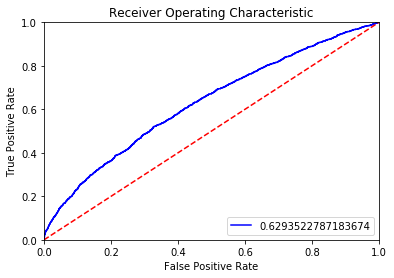

In [85]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

#### AUC on the basis of our fixed threshold

In [86]:
from sklearn import metrics
#y_pred_class is the list of predicted values on the basis of 0.46 threshold
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
 
print(auc)
print(fpr)
print(tpr)

0.5847965769063838
[0.         0.52801381 1.        ]
[0.         0.69760696 1.        ]


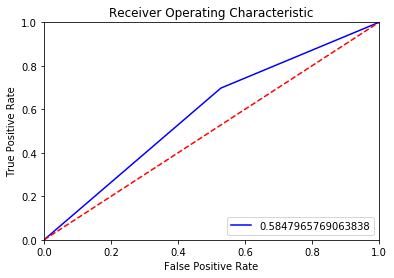

In [87]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

### Logistic regression without SMOTE

In [88]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train, Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [89]:
print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [90]:
# print classification report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[15064     0]
 [ 1379     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15064
           1       0.00      0.00      0.00      1379

    accuracy                           0.92     16443
   macro avg       0.46      0.50      0.48     16443
weighted avg       0.84      0.92      0.88     16443

0.9161345253299277


C:\Users\vishw\newpythoninstall\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishw\newpythoninstall\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishw\newpythoninstall\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predictions on Test data

In [91]:
df_test.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,3.0,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61


In [92]:
test=df_test.values
test=scaler.transform(test)
#print(test)

In [93]:
# Predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10)

# fit the model on the data and predict the values

model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=10)

In [94]:
test_pred = model_DecisionTree.predict(test)
test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [95]:
df_test=pd.read_csv(r"test_hr.csv", header=0)
df_test["Pred"]=test_pred
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Pred
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0


In [96]:
df_test["Pred"].value_counts()

0    21169
1     2321
Name: Pred, dtype: int64

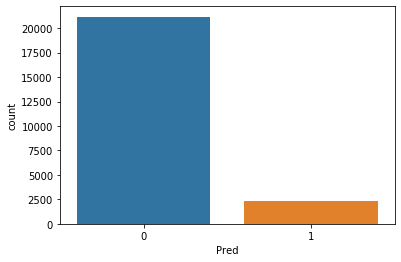

In [97]:
sns.countplot(x = "Pred", data=df_test)
plt.show()

## Feature Selection

### Dropping the 3 least important variables

In [98]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [99]:
df_train_rev = pd.DataFrame.copy(df_train)  # creating a copy of dataframe

In [100]:
df_train_rev.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [101]:
df_train_rev.shape

(54808, 14)

In [102]:
df_train_rev.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [103]:
df_train_rev = df_train_rev.drop(['recruitment_channel',"gender","education"], axis=1) #droping the variables

In [104]:
df_train_rev.shape

(54808, 11)

In [105]:
df_train_rev.describe()

,employee_id,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,4.972796,15.428970,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,2.506046,8.764954,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,4.000000,11.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,5.000000,14.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,7.000000,21.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,8.000000,33.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [106]:
df_train_rev.isnull().sum()

employee_id             0
department              0
region                  0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

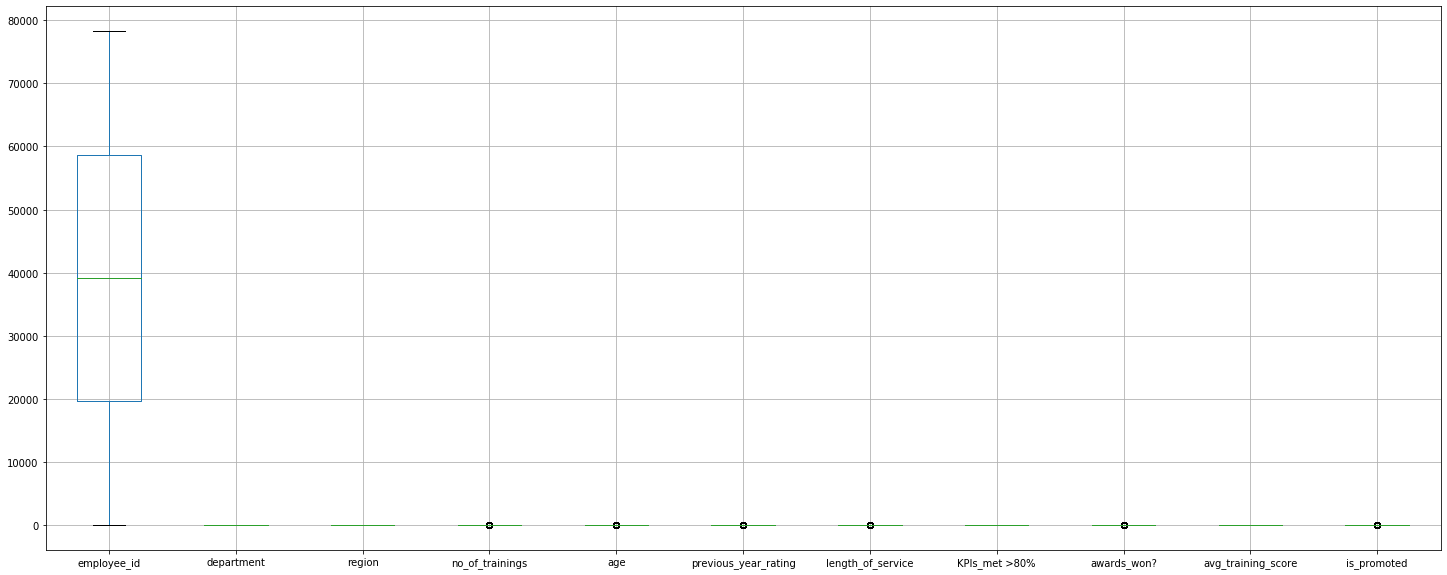

In [107]:
df_train_rev.boxplot(figsize=(25,10))

In [108]:
#Creating X and Y variables

X = df_train_rev.values[:,0:-1]
Y = df_train_rev.values[:,-1]
Y = Y.astype(int)

In [109]:
print(X.shape)
print(Y.shape)

(54808, 10)
(54808,)


#### Scaling the data

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# scaler.fit_transform(X)

In [111]:
print(X)

[[ 1.16185837  0.80893285  1.77652645 ...  1.35687789 -0.15401776
  -1.07593145]
 [ 1.14870885 -0.38818322 -0.16303375 ... -0.73698599 -0.15401776
  -0.25328242]
 [-1.40274081  0.80893285 -0.61940086 ... -0.73698599 -0.15401776
  -1.00114517]
 ...
 [-1.11916278 -1.98433798 -1.76031862 ...  1.35687789 -0.15401776
   1.1676568 ]
 [-1.13262222  0.80893285  2.00471    ... -0.73698599 -0.15401776
  -1.37507655]
 [ 0.54591182 -1.1862606  -0.16303375 ... -0.73698599 -0.15401776
  -1.07593145]]


### Splitting the data into Train and Test

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [113]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(38365, 10)
(16443, 10)
(38365,)
(16443,)


### Running the Base Decision tree model

In [114]:
from sklearn.tree import DecisionTreeClassifier

#creating a model object
model_DT = DecisionTreeClassifier(random_state=10, criterion="gini")

#training the data on Model object
model_DT.fit(X_train, Y_train)

#predicting on test data
y_pred = model_DT.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [115]:
print(list(zip(Y_test, y_pred)))


[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test, y_pred))
print()
print(accuracy_score(Y_test, y_pred))
print()
print(classification_report(Y_test, y_pred))

[[14169   895]
 [  749   630]]

0.900018244845831

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     15064
           1       0.41      0.46      0.43      1379

    accuracy                           0.90     16443
   macro avg       0.68      0.70      0.69     16443
weighted avg       0.90      0.90      0.90     16443



#### Dropping another least important variable and rerun the base DT model

In [117]:
df_train_rev.columns

Index(['employee_id', 'department', 'region', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [118]:
df_train_rev = df_train_rev.drop(['no_of_trainings'], axis=1)

In [119]:
df_train_rev.shape

(54808, 10)

In [120]:
df_train_rev.isnull().sum()

employee_id             0
department              0
region                  0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [121]:
X = df_train_rev.values[:,0:-1]
Y = df_train_rev.values[:,-1]
Y = Y.astype(int)

In [122]:
print(X.shape)
print(Y.shape)

(54808, 9)
(54808,)


#### Scaling the data

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# scaler.fit_transform(X)

In [124]:
print(X)

[[ 1.16185837  0.80893285  1.77652645 ...  1.35687789 -0.15401776
  -1.07593145]
 [ 1.14870885 -0.38818322 -0.16303375 ... -0.73698599 -0.15401776
  -0.25328242]
 [-1.40274081  0.80893285 -0.61940086 ... -0.73698599 -0.15401776
  -1.00114517]
 ...
 [-1.11916278 -1.98433798 -1.76031862 ...  1.35687789 -0.15401776
   1.1676568 ]
 [-1.13262222  0.80893285  2.00471    ... -0.73698599 -0.15401776
  -1.37507655]
 [ 0.54591182 -1.1862606  -0.16303375 ... -0.73698599 -0.15401776
  -1.07593145]]


### Splitting the data into Train and Test

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [126]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(38365, 9)
(16443, 9)
(38365,)
(16443,)


### Running the Decision tree model

In [127]:
from sklearn.tree import DecisionTreeClassifier

#creating a model object
model_DT = DecisionTreeClassifier(random_state=10, criterion="gini")

#training the data on Model object
model_DT.fit(X_train, Y_train)

#predicting on test data
y_pred = model_DT.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [128]:
print(list(zip(Y_test, y_pred)))


[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test, y_pred))
print()
print(accuracy_score(Y_test, y_pred))
print()
print(classification_report(Y_test, y_pred))

[[14167   897]
 [  747   632]]

0.900018244845831

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     15064
           1       0.41      0.46      0.43      1379

    accuracy                           0.90     16443
   macro avg       0.68      0.70      0.69     16443
weighted avg       0.90      0.90      0.90     16443



> CONCLUSION:
    
>    1. From all of the above models build the above decision tree model after tuning and doing some feature selection is          giving a better results.
>    2. The precision and recall is still low due to the imbalanced data, tried using smote for the same but still getting        the same results as base DT model 